In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('C:/Users/Willkommen/Desktop/day.csv')  

# Testing whether loading is successful
print(data.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [2]:
# Convert numeric categorical variables to strings
data['season'] = data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
data['weathersit'] = data['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light_snow', 4: 'heavy_rain'})
data['yr'] = data['yr'].map({0: '2018', 1: '2019'})

# Display the updated dataset
print(data.head())

   instant      dteday  season    yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018  spring  2018     1        0        6           0   
1        2  02-01-2018  spring  2018     1        0        0           0   
2        3  03-01-2018  spring  2018     1        0        1           1   
3        4  04-01-2018  spring  2018     1        0        2           1   
4        5  05-01-2018  spring  2018     1        0        3           1   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0       mist  14.110847  18.18125  80.5833  10.749882     331         654   
1       mist  14.902598  17.68695  69.6087  16.652113     131         670   
2      clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3      clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4      clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


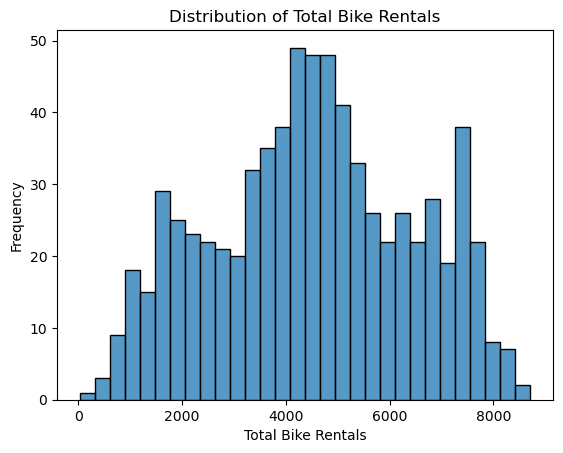

C:\Users\Willkommen\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


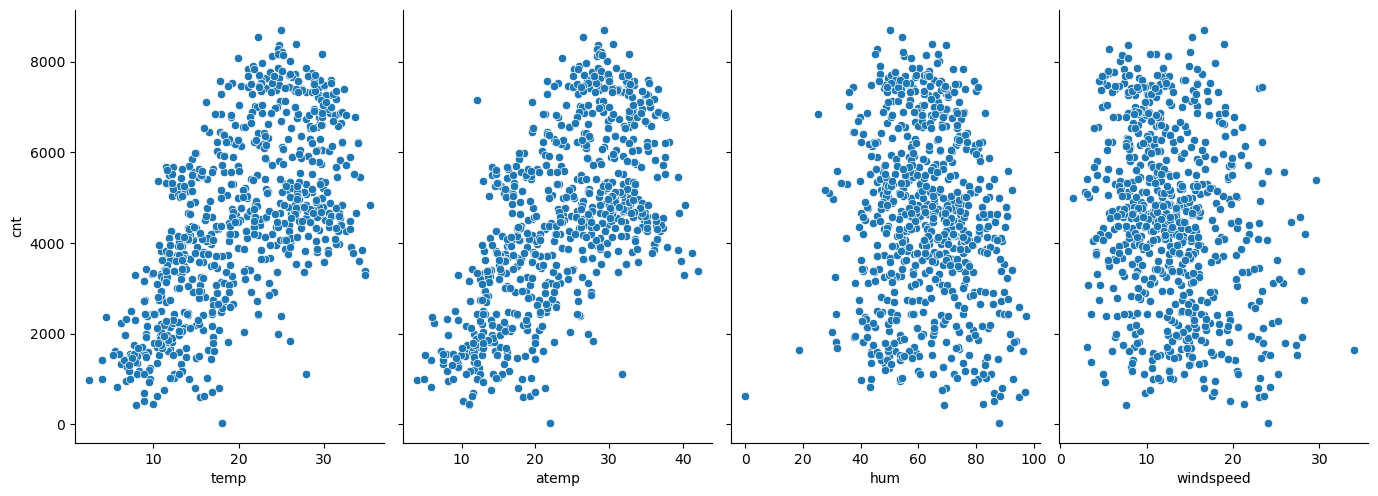

In [3]:
#Visualise the distribution of the target variable
sns.histplot(data['cnt'], bins=30)
plt.title('Distribution of Total Bike Rentals')
plt.xlabel('Total Bike Rentals')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationship between independent variables and the target variable
sns.pairplot(data, x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars='cnt', height=5, aspect=0.7)
plt.show()

In [4]:
# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['season', 'weathersit', 'yr'], drop_first=True)

# Display the updated data 
print(data.head())

   instant      dteday  mnth  holiday  weekday  workingday       temp  \
0        1  01-01-2018     1        0        6           0  14.110847   
1        2  02-01-2018     1        0        0           0  14.902598   
2        3  03-01-2018     1        0        1           1   8.050924   
3        4  04-01-2018     1        0        2           1   8.200000   
4        5  05-01-2018     1        0        3           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  season_spring  \
0  18.18125  80.5833  10.749882     331         654   985           True   
1  17.68695  69.6087  16.652113     131         670   801           True   
2   9.47025  43.7273  16.636703     120        1229  1349           True   
3  10.60610  59.0435  10.739832     108        1454  1562           True   
4  11.46350  43.6957  12.522300      82        1518  1600           True   

   season_summer  season_winter  weathersit_light_snow  weathersit_mist  \
0          False          Fal

In [5]:
# Define the features and the target variable
X = data.drop(['cnt', 'casual', 'registered', 'dteday', 'instant'], axis=1)
y = data['cnt']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Initialize the linear regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = lr.predict(X_test_scaled)

# Calculate R-squared on the test data
print("R-squared on test data:", r2_score(y_test, y_pred))

R-squared on test data: 0.8291379087166058


                       Coefficient
mnth                   -117.749295
holiday                 -77.332638
weekday                 121.953959
workingday               66.102952
temp                    499.904297
atemp                   416.563438
hum                    -150.068653
windspeed              -178.268978
season_spring          -462.153599
season_summer            80.195191
season_winter           347.156020
weathersit_light_snow  -316.176419
weathersit_mist        -222.164174
yr_2019                 987.117078


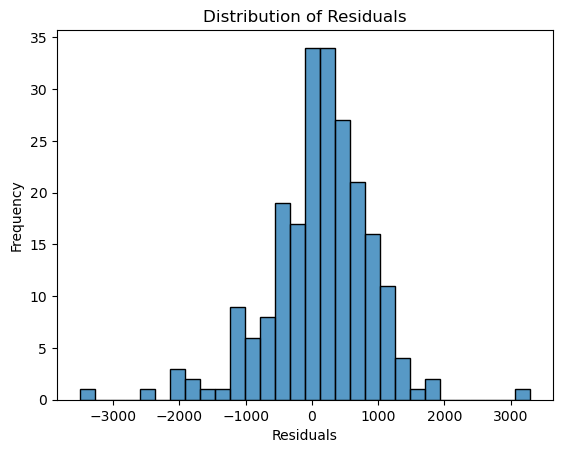

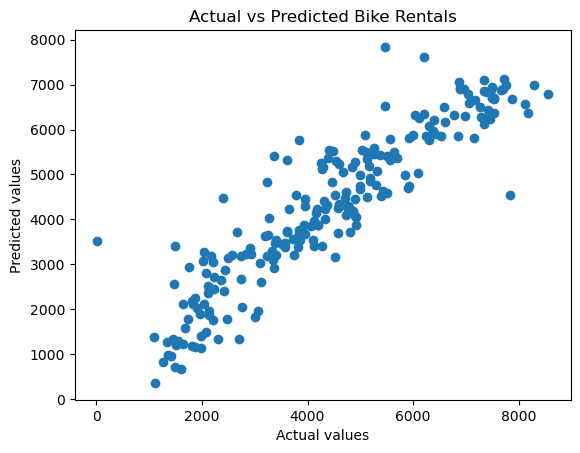

In [8]:
# Print model coefficients
coefficients = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Plot residuals
residuals = y_test - y_pred
sns.histplot(residuals, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Bike Rentals')
plt.show()